In [21]:
!pip install -q kaggle

In [22]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"codebyakshita","key":"85d233cf153282bcaddf715d0f9fd817"}'}

In [23]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [24]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [25]:
import tensorflow as tf
(x_train, y_train), (x_test,y_test)=tf.keras.datasets.mnist.load_data()
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [26]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print("Train reshaped:", x_train.shape)

Train reshaped: (60000, 28, 28, 1)


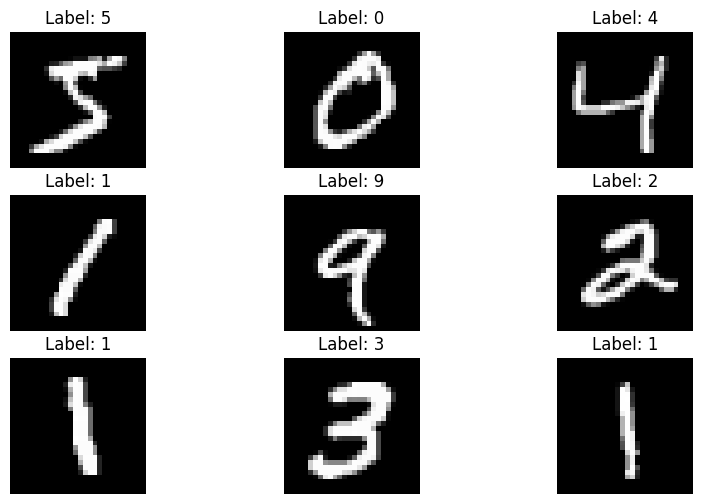

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Set the overall figure size

for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)  # 3x3 grid of subplots
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')  # Show image in grayscale
    plt.title(f"Label: {y_train[i]}")  # Set the title as the label
    plt.axis('off')  # Hide axes for cleaner look

plt.show()

In [28]:
(x_train_c10, y_train_c10), (x_test_c10,y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0
print(f"CIFAR-10 train shape: (x_train_c10:shape)")

CIFAR-10 train shape: (x_train_c10:shape)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy' ,metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history= model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.9005 - loss: 0.3330 - val_accuracy: 0.9832 - val_loss: 0.0560
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9852 - loss: 0.0482 - val_accuracy: 0.9875 - val_loss: 0.0432
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9901 - loss: 0.0302 - val_accuracy: 0.9872 - val_loss: 0.0427
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9922 - loss: 0.0229 - val_accuracy: 0.9898 - val_loss: 0.0371
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9946 - loss: 0.0155 - val_accuracy: 0.9877 - val_loss: 0.0480


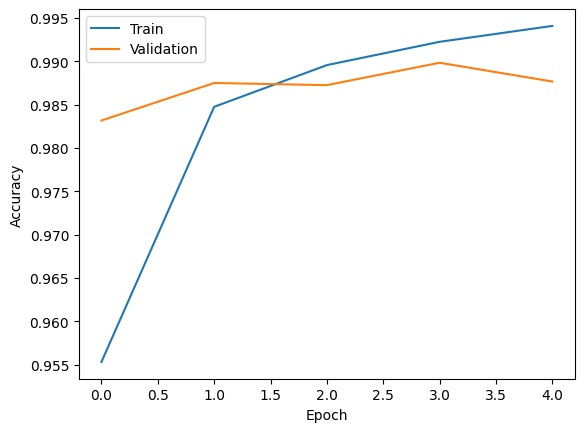

In [31]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],
         label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
test_loss, test_acc=model.evaluate(x_test,y_test)
print("Test Accuracy: {test_acc:4f}")
x_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9860 - loss: 0.0462
Test Accuracy: {test_acc:4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_c10)

In [34]:
from tensorflow.keras.layers import Dropout, BatchNormalization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(x_test_c10,y_test_c10))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 73ms/step - accuracy: 0.3469 - loss: 1.7777 - val_accuracy: 0.5355 - val_loss: 1.2900
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.5256 - loss: 1.3361 - val_accuracy: 0.5171 - val_loss: 1.4242
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 72ms/step - accuracy: 0.5711 - loss: 1.2211 - val_accuracy: 0.6051 - val_loss: 1.1159
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.6115 - loss: 1.1167 - val_accuracy: 0.6129 - val_loss: 1.1230
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.6320 - loss: 1.0476 - val_accuracy: 0.6670 - val_loss: 0.9620
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 72ms/step - accuracy: 0.6487 - loss: 1.0160 - val_accuracy: 0.6735 - val_loss: 0.9369
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 71ms/step - accuracy: 0.6559 - loss: 0.9870 - val_accuracy: 0.6484 - val_loss: 1.0156
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1000
           1       0.88      0.83      0.86      1000
           2       0.71      0.48      0.57      1000
           3       0.55      0.51      0.53      1000
           4       0.69      0.68      0.69      1000
           5       0.57      0.71      0.63      1000
           6       0.74      0.83      0.78      1000
           7       0.80      0.70      0.75      1000
           8       0.87      0.78      0.82      1000
           9       0.66      0.90      0.76      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.72      0.71     10000



<function matplotlib.pyplot.show(close=None, block=None)>

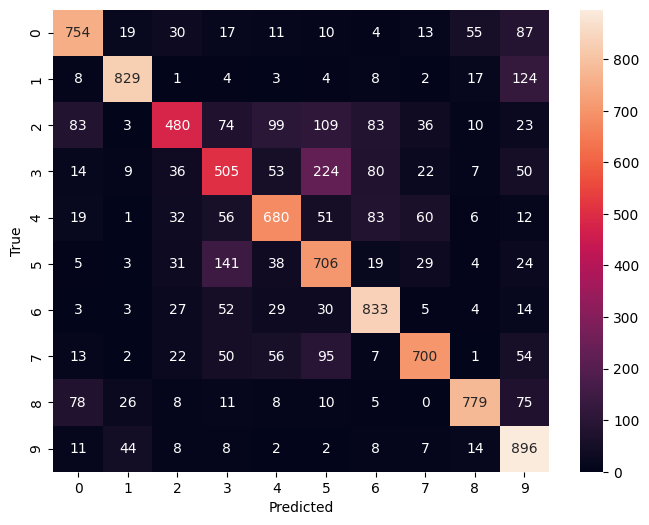

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred_c10=model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10, y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show



In [36]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
val_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [40]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.7861 - loss: 0.5615 - val_accuracy: 0.7985 - val_loss: 0.5161
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.7983 - loss: 0.4979 - val_accuracy: 0.7985 - val_loss: 0.5149
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.8001 - loss: 0.4889 - val_accuracy: 0.7985 - val_loss: 0.5124
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.7971 - loss: 0.4802 - val_accuracy: 0.7985 - val_loss: 0.5221
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 390s 2s/step - accuracy: 0.8046 - loss: 0.4588 - val_accuracy: 0.7980 - val_loss: 0.5229


In [41]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=3, validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1651s 6s/step - accuracy: 0.7992 - loss: 0.4907 - val_accuracy: 0.7985 - val_loss: 0.5255
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1608s 6s/step - accuracy: 0.8083 - loss: 0.4426 - val_accuracy: 0.7990 - val_loss: 0.5238
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1625s 6s/step - accuracy: 0.7991 - loss: 0.4358 - val_accuracy: 0.7970 - val_loss: 0.5297


In [42]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step


/tmp/ipython-input-218468852.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


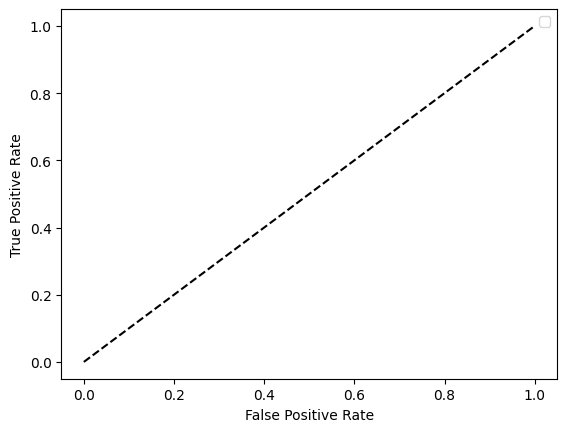

In [43]:
from sklearn.metrics import roc_curve,auc
y_pred_proba=loaded_model.predict(val_generator)
fpr,tpr,_=roc_curve(val_generator.classes,y_pred_proba)

roc_auc=auc(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()